In [271]:
!pip install numpy pandas matplotlib seaborn

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [273]:
df = pd.read_csv("Downloads/archive/games.csv")

In [274]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [ ]:
df = df.drop('date_release', axis='columns')

In [275]:
df['price_final_group'] = pd.cut(df.price_final, bins = [0,10,30,50,70,100], labels = ['0-10', '10-30', '30-50', '50-70', '70-100'])


In [276]:
df['price_original_group'] = pd.cut(df.price_original, bins = [0,10,30,50,70,100], labels = ['0-10', '10-30', '30-50', '50-70', '70-100'])


In [277]:
df['user_review_group'] = pd.cut(df.price_final, bins = [0,100,1000,5000,10000], labels = ['0-100', '100-1000', '1000-5000', '5000-10000'])

In [278]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_group,price_original_group,user_review_group
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,0-10,0-10,0-100
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,0-10,0-10,0-100
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,10-30,10-30,0-100
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,10-30,10-30,0-100
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,10-30,10-30,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True,10-30,NaN,0-100
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True,30-50,NaN,0-100
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True,10-30,NaN,0-100
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True,10-30,NaN,0-100


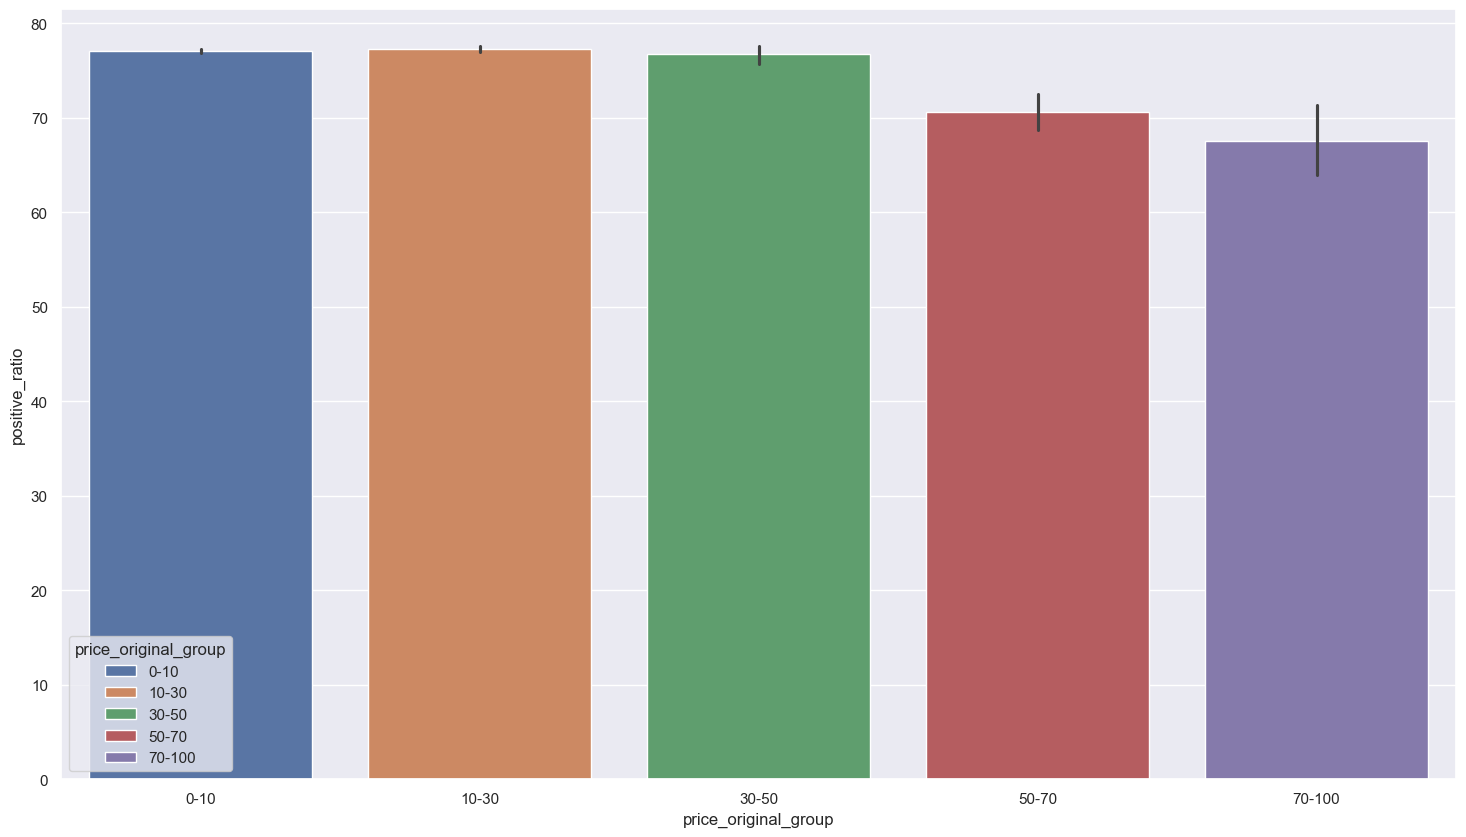

In [279]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'price_original_group', y = 'positive_ratio', hue = 'price_original_group')

plt.savefig("price_original_group.png")

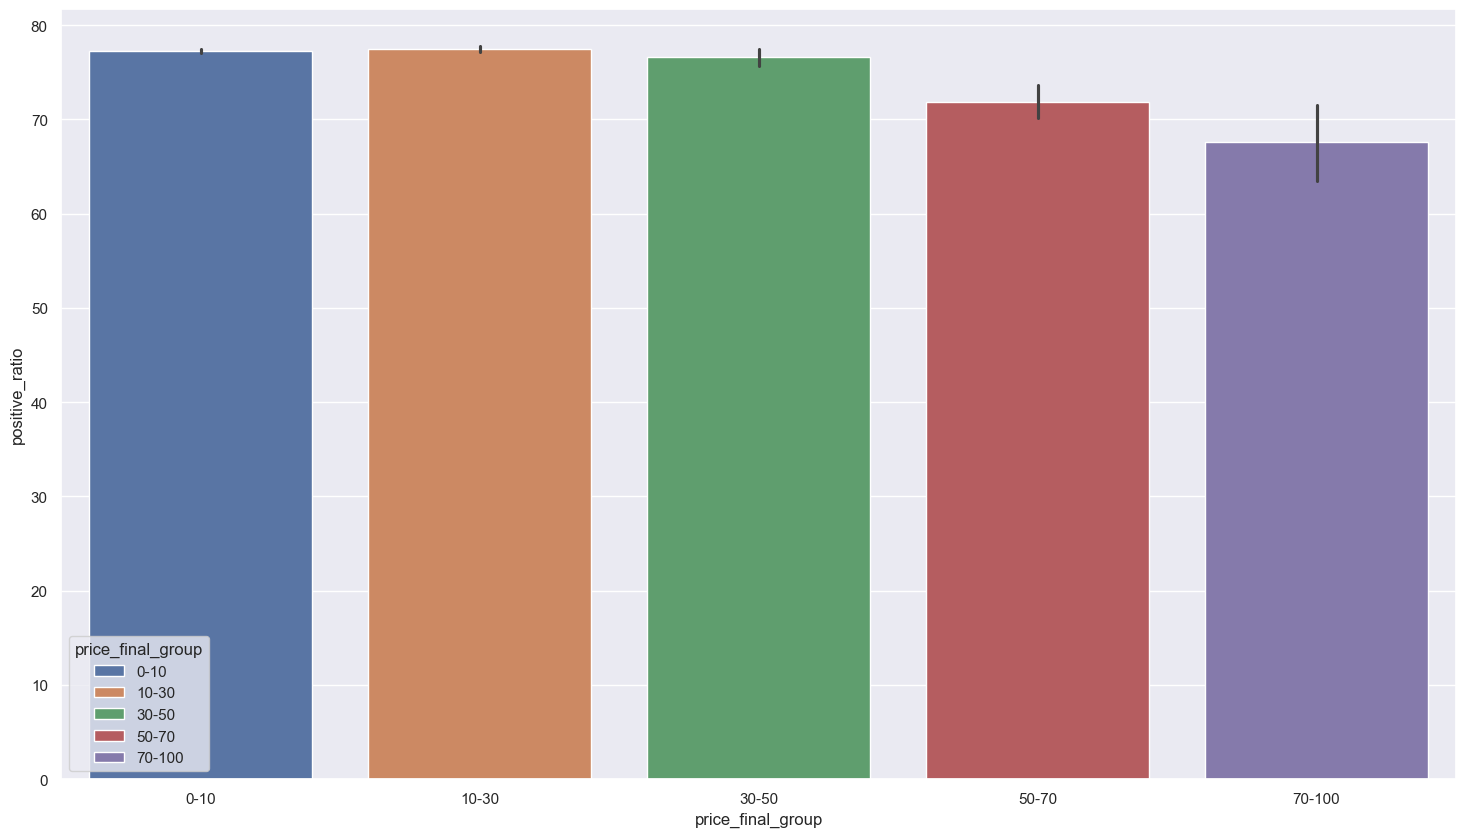

In [280]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'price_final_group', y = 'positive_ratio', hue = 'price_final_group')

plt.savefig("price_final_group.png")

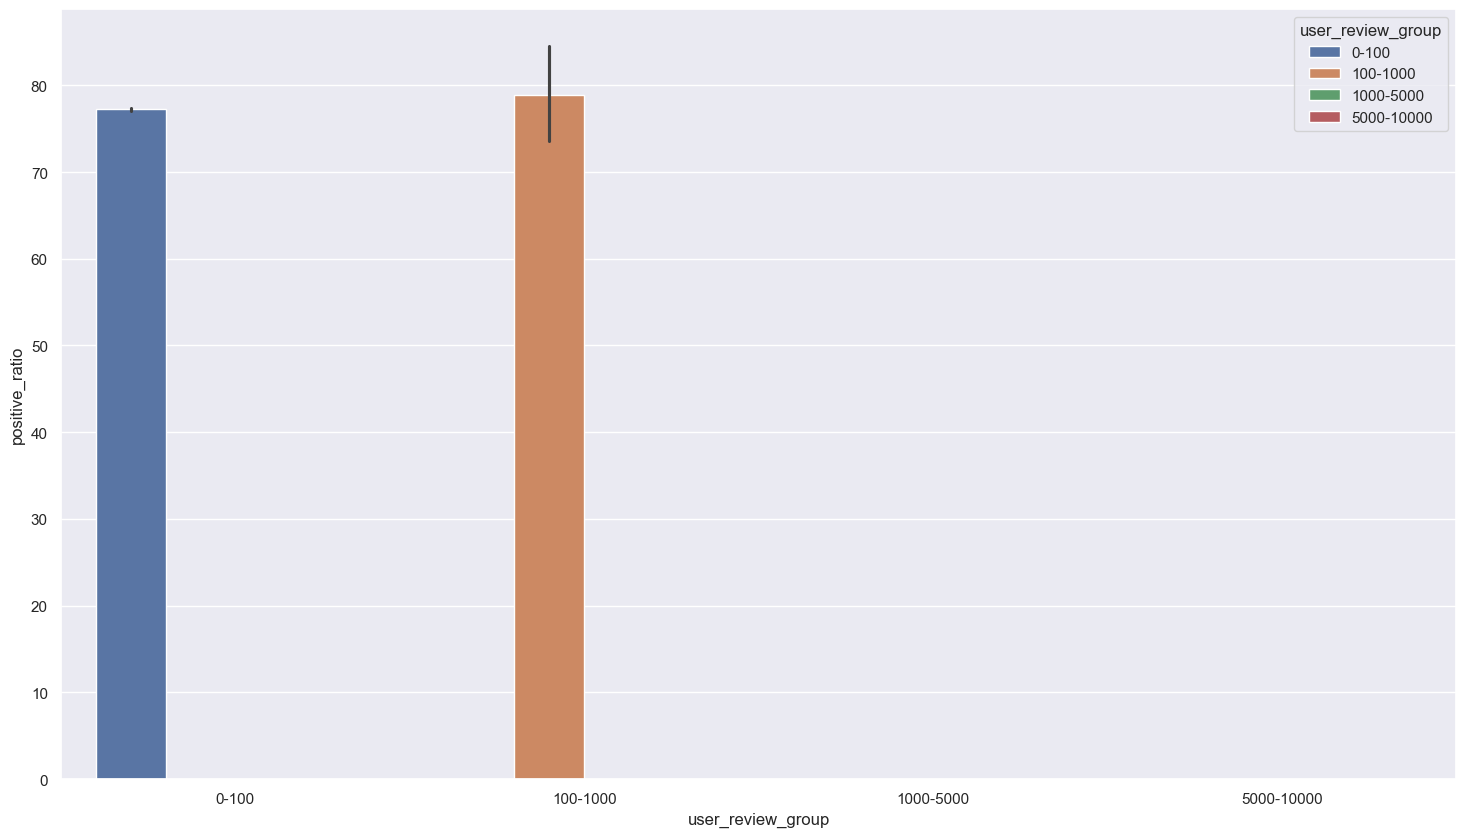

In [281]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'user_review_group', y = 'positive_ratio', hue = 'user_review_group')

plt.savefig("user_review_group.png")

In [282]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_group,price_original_group,user_review_group
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,0-10,0-10,0-100
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,0-10,0-10,0-100
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,10-30,10-30,0-100
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,10-30,10-30,0-100
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,10-30,10-30,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True,10-30,NaN,0-100
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True,30-50,NaN,0-100
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True,10-30,NaN,0-100
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True,10-30,NaN,0-100


In [283]:
# Define predictors & target
X = df[['user_reviews', 'price_final', 'price_original', 'discount', 'linux', 'mac']]
Y= df['positive_ratio']

In [284]:
print(X)

       user_reviews  price_final  price_original  discount  linux    mac
0              2199         9.99            9.99       0.0  False  False
1                21         2.99            2.99       0.0  False  False
2              3722        14.99           14.99       0.0   True   True
3               873        14.99           14.99       0.0  False  False
4              8784        11.99           11.99       0.0  False   True
...             ...          ...             ...       ...    ...    ...
50867           101        22.00            0.00       0.0  False  False
50868         29458        40.00            0.00       0.0  False  False
50869          1128        30.00            0.00       0.0  False  False
50870            82        17.00            0.00       0.0  False  False
50871           144         4.00            0.00       0.0  False  False

[50872 rows x 6 columns]


In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [286]:
print(X_pca)

[[  374.57504138    -5.76242385]
 [-1803.42499357    -4.55426036]
 [ 1897.57506674    -6.62674152]
 ...
 [ -696.42473844    -8.46042422]
 [-1742.42485546    -6.54497411]
 [-1680.42497253    -4.62377758]]


In [287]:
X_pca.shape

(50872, 2)

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y, test_size = 0.2, random_state =0)

In [289]:
print(X)

       user_reviews  price_final  price_original  discount  linux    mac
0              2199         9.99            9.99       0.0  False  False
1                21         2.99            2.99       0.0  False  False
2              3722        14.99           14.99       0.0   True   True
3               873        14.99           14.99       0.0  False  False
4              8784        11.99           11.99       0.0  False   True
...             ...          ...             ...       ...    ...    ...
50867           101        22.00            0.00       0.0  False  False
50868         29458        40.00            0.00       0.0  False  False
50869          1128        30.00            0.00       0.0  False  False
50870            82        17.00            0.00       0.0  False  False
50871           144         4.00            0.00       0.0  False  False

[50872 rows x 6 columns]


In [290]:
# Fit regression model
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.0005930929841246879


In [291]:
# Model Prediction
Y_pred1 = reg.predict(X_test)

In [292]:
mae1 = mean_absolute_error(Y_test, Y_pred1).round(2)
mse1 = mean_squared_error(Y_test, Y_pred1).round(2)
mape1 = ((np.mean(np.abs(Y_test-Y_pred1)/Y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae1}\n MSE:{mse1} \n MAPE:{mape1}%.")

MAE: 14.59
 MSE:336.13 
 MAPE:inf%.


In [293]:
from sklearn.metrics import root_mean_squared_error

In [294]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred1)).round(2)
print(f"RMSE: {rmse}")

RMSE: 18.33
